# Generative Adverserial Networks (GANs)

- You can think of a GAN as the combination of counterfeiter and a cop in game of cat and mouse
- The counterfeiter is learning to pass false notes, and cop is learning to detect them is learning to detect them
- The idea is from Ian Goodfellow
- One night in 2014, Ian Goodfellow went restuarant to celebrate with a fellow doctoral student who had just graduated
- Goodfellowâ€™s friends were proposing was to use a complex statistical analysis of the elements that make up a photograph to help machines come up with images by themselves
- But as he pondered the problem over his drink, he hit on an idea. What if you pitted two neural networks against each other? His friends were skeptical, so once he got home, where his girlfriend was already fast asleep, he decided to give it a try. Goodfellow coded into the early hours and then tested his software. It worked the first time.

<img src="GANS_block_diagram.png" width="700" height="700">

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

## 2. Define hyper-parameters

In [2]:
img_rows = 28
img_cols = 28
channels = 1
img_shape = (img_rows, img_cols, channels)
latent_dim = 100
epochs = 2000
batch_size=128
sample_interval=50

## 3. Load MNIST Dataset and Prepare the target annotations for GAN

In [3]:
# Load the dataset
(X_train, _), (_, _) = mnist.load_data()
# Rescale -1 to 1
X_train = X_train / 127.5 - 1.
X_train = np.expand_dims(X_train, axis=3)
# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

## 4. Lets define a function called build_generator() which defines our generator structure

In [4]:
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(np.prod(img_shape), activation='tanh'))
    model.add(Reshape(img_shape))

#     model.summary()
    noise = Input(shape=(latent_dim,))
    img = model(noise)

    return Model(noise, img)

## 5. Lets define a function called build_discriminator() which defines our  discriminator structure

In [5]:
def build_discriminator():

    model = Sequential()

    model.add(Flatten(input_shape=img_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    
#     model.summary()

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(inputs=img, outputs=validity)

## 6. Build and compile the discriminator

In [6]:
optimizer = Adam(0.0002, 0.5)
# Build and compile the discriminator
discriminator = build_discriminator()

In [7]:
# Build the generator
generator = build_generator()

## 7. Define the combined model

In [8]:
def build_combined():
    # The generator takes noise as input and generates imgs
    z = Input(shape=(latent_dim,))
    img = generator(z)

    # For the combined model we will only train the generator
    discriminator.trainable = False

    # The discriminator takes generated images as input and determines validity
    validity = discriminator(img)

    # The combined model  (stacked generator and discriminator)
    # Trains the generator to fool the discriminator
    combined = Model(z, validity)
    combined.compile(loss='binary_crossentropy',optimizer=optimizer)
    return combined

## 8. This is a tool for visualizing the performance of generator

In [9]:
def sample_images(epoch):
    r, c = 5, 5
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    gen_imgs = generator.predict(noise)

    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    
    plt.show()
    plt.close()

In [10]:
combined = build_combined()
discriminator.trainable = True
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

/Users/miladtoutounchian/anaconda3/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.721613, acc.: 47.66%] [G loss: 0.594970]


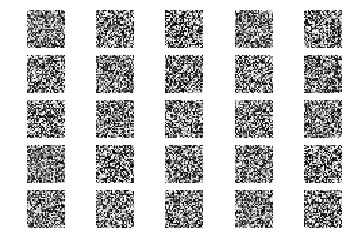

1 [D loss: 0.486996, acc.: 63.28%] [G loss: 0.623629]
2 [D loss: 0.422884, acc.: 64.84%] [G loss: 0.719578]
3 [D loss: 0.392609, acc.: 72.27%] [G loss: 0.809970]
4 [D loss: 0.320927, acc.: 84.38%] [G loss: 0.913333]
5 [D loss: 0.290053, acc.: 89.06%] [G loss: 1.045241]
6 [D loss: 0.265753, acc.: 94.14%] [G loss: 1.151983]
7 [D loss: 0.227838, acc.: 96.88%] [G loss: 1.246964]
8 [D loss: 0.202755, acc.: 98.44%] [G loss: 1.324618]
9 [D loss: 0.187425, acc.: 99.22%] [G loss: 1.404775]
10 [D loss: 0.161744, acc.: 100.00%] [G loss: 1.469197]
11 [D loss: 0.160119, acc.: 100.00%] [G loss: 1.555085]
12 [D loss: 0.148622, acc.: 99.61%] [G loss: 1.679155]
13 [D loss: 0.129394, acc.: 100.00%] [G loss: 1.731951]
14 [D loss: 0.118824, acc.: 100.00%] [G loss: 1.772180]
15 [D loss: 0.103728, acc.: 100.00%] [G loss: 1.888832]
16 [D loss: 0.106739, acc.: 100.00%] [G loss: 1.974744]
17 [D loss: 0.098475, acc.: 100.00%] [G loss: 2.020488]
18 [D loss: 0.085351, acc.: 100.00%] [G loss: 2.111408]
19 [D loss:

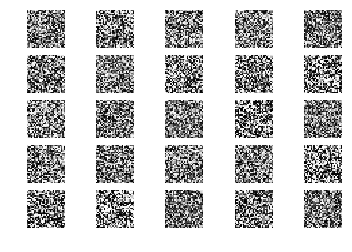

51 [D loss: 0.028898, acc.: 100.00%] [G loss: 3.433434]
52 [D loss: 0.026126, acc.: 100.00%] [G loss: 3.396957]
53 [D loss: 0.025854, acc.: 100.00%] [G loss: 3.485193]
54 [D loss: 0.035834, acc.: 100.00%] [G loss: 3.419189]
55 [D loss: 0.031903, acc.: 100.00%] [G loss: 3.514569]
56 [D loss: 0.027387, acc.: 100.00%] [G loss: 3.546209]
57 [D loss: 0.028716, acc.: 100.00%] [G loss: 3.480960]
58 [D loss: 0.032707, acc.: 100.00%] [G loss: 3.558677]
59 [D loss: 0.035880, acc.: 100.00%] [G loss: 3.654599]
60 [D loss: 0.029061, acc.: 100.00%] [G loss: 3.622781]
61 [D loss: 0.026310, acc.: 100.00%] [G loss: 3.667106]
62 [D loss: 0.034002, acc.: 99.61%] [G loss: 3.690568]
63 [D loss: 0.028781, acc.: 100.00%] [G loss: 3.728887]
64 [D loss: 0.025976, acc.: 100.00%] [G loss: 3.747234]
65 [D loss: 0.029144, acc.: 100.00%] [G loss: 3.688444]
66 [D loss: 0.028984, acc.: 100.00%] [G loss: 3.712609]
67 [D loss: 0.035833, acc.: 100.00%] [G loss: 3.755661]
68 [D loss: 0.039133, acc.: 100.00%] [G loss: 3.7

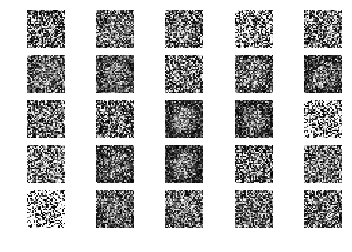

101 [D loss: 0.239928, acc.: 90.62%] [G loss: 2.286978]
102 [D loss: 0.173632, acc.: 91.80%] [G loss: 2.917244]
103 [D loss: 0.585566, acc.: 75.39%] [G loss: 2.041780]
104 [D loss: 0.307145, acc.: 82.81%] [G loss: 2.456198]
105 [D loss: 0.133833, acc.: 97.66%] [G loss: 3.237056]
106 [D loss: 0.558284, acc.: 74.61%] [G loss: 2.138550]
107 [D loss: 0.236936, acc.: 88.28%] [G loss: 2.611065]
108 [D loss: 0.112233, acc.: 99.22%] [G loss: 2.853525]
109 [D loss: 0.421194, acc.: 77.34%] [G loss: 2.154867]
110 [D loss: 0.197293, acc.: 89.45%] [G loss: 2.837285]
111 [D loss: 0.366767, acc.: 84.38%] [G loss: 2.061300]
112 [D loss: 0.324097, acc.: 83.98%] [G loss: 2.338085]
113 [D loss: 0.184416, acc.: 95.70%] [G loss: 3.271611]
114 [D loss: 0.620829, acc.: 71.09%] [G loss: 1.908536]
115 [D loss: 0.366521, acc.: 83.20%] [G loss: 2.331197]
116 [D loss: 0.191704, acc.: 90.62%] [G loss: 3.033735]
117 [D loss: 0.246158, acc.: 92.97%] [G loss: 2.502098]
118 [D loss: 0.253747, acc.: 87.11%] [G loss: 2.

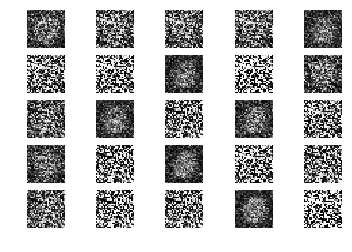

151 [D loss: 0.407249, acc.: 75.39%] [G loss: 2.568780]
152 [D loss: 0.488227, acc.: 73.44%] [G loss: 2.349216]
153 [D loss: 0.320832, acc.: 82.42%] [G loss: 2.476537]
154 [D loss: 0.453762, acc.: 77.34%] [G loss: 2.010401]
155 [D loss: 0.305224, acc.: 82.42%] [G loss: 2.789494]
156 [D loss: 0.560510, acc.: 70.31%] [G loss: 2.027116]
157 [D loss: 0.282426, acc.: 83.98%] [G loss: 2.655093]
158 [D loss: 0.342767, acc.: 84.38%] [G loss: 2.431369]
159 [D loss: 0.341599, acc.: 83.59%] [G loss: 2.337430]
160 [D loss: 0.302996, acc.: 84.77%] [G loss: 2.459157]
161 [D loss: 0.343749, acc.: 82.81%] [G loss: 2.445383]
162 [D loss: 0.406613, acc.: 78.52%] [G loss: 2.637389]
163 [D loss: 0.385240, acc.: 80.47%] [G loss: 2.400874]
164 [D loss: 0.334226, acc.: 83.98%] [G loss: 2.475993]
165 [D loss: 0.372388, acc.: 80.86%] [G loss: 2.455539]
166 [D loss: 0.301904, acc.: 83.20%] [G loss: 2.398131]
167 [D loss: 0.356349, acc.: 81.25%] [G loss: 2.666097]
168 [D loss: 0.466151, acc.: 75.00%] [G loss: 2.

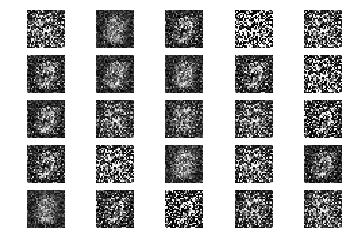

201 [D loss: 0.591977, acc.: 70.31%] [G loss: 1.855240]
202 [D loss: 0.333457, acc.: 82.42%] [G loss: 2.751943]
203 [D loss: 0.636044, acc.: 60.94%] [G loss: 1.799124]
204 [D loss: 0.351484, acc.: 81.64%] [G loss: 2.717781]
205 [D loss: 0.530849, acc.: 68.36%] [G loss: 2.261395]
206 [D loss: 0.341654, acc.: 84.38%] [G loss: 2.493859]
207 [D loss: 0.659416, acc.: 62.89%] [G loss: 1.847637]
208 [D loss: 0.372717, acc.: 78.52%] [G loss: 2.878834]
209 [D loss: 0.732116, acc.: 57.03%] [G loss: 1.691765]
210 [D loss: 0.383891, acc.: 76.17%] [G loss: 2.474631]
211 [D loss: 0.467668, acc.: 75.00%] [G loss: 2.155669]
212 [D loss: 0.426033, acc.: 76.95%] [G loss: 2.295050]
213 [D loss: 0.516500, acc.: 71.88%] [G loss: 2.251391]
214 [D loss: 0.419768, acc.: 78.52%] [G loss: 2.347528]
215 [D loss: 0.577919, acc.: 69.53%] [G loss: 1.959851]
216 [D loss: 0.407568, acc.: 77.73%] [G loss: 2.590083]
217 [D loss: 0.673731, acc.: 60.16%] [G loss: 1.844708]
218 [D loss: 0.411744, acc.: 76.17%] [G loss: 2.

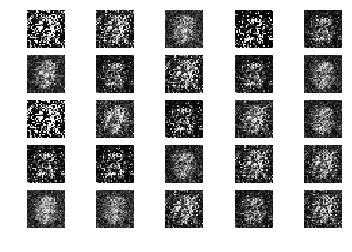

251 [D loss: 0.581977, acc.: 71.48%] [G loss: 1.757390]
252 [D loss: 0.807995, acc.: 49.22%] [G loss: 1.206411]
253 [D loss: 0.647879, acc.: 54.30%] [G loss: 1.537105]
254 [D loss: 0.739954, acc.: 50.78%] [G loss: 1.197156]
255 [D loss: 0.641772, acc.: 57.81%] [G loss: 1.385927]
256 [D loss: 0.704188, acc.: 55.47%] [G loss: 1.294372]
257 [D loss: 0.642652, acc.: 66.80%] [G loss: 1.324091]
258 [D loss: 0.653479, acc.: 62.89%] [G loss: 1.388945]
259 [D loss: 0.676201, acc.: 61.33%] [G loss: 1.255336]
260 [D loss: 0.627525, acc.: 65.62%] [G loss: 1.324361]
261 [D loss: 0.678393, acc.: 58.98%] [G loss: 1.280927]
262 [D loss: 0.619187, acc.: 63.28%] [G loss: 1.378630]
263 [D loss: 0.674909, acc.: 54.30%] [G loss: 1.321842]
264 [D loss: 0.649188, acc.: 60.16%] [G loss: 1.235042]
265 [D loss: 0.692207, acc.: 56.64%] [G loss: 1.132606]
266 [D loss: 0.634819, acc.: 59.77%] [G loss: 1.300388]
267 [D loss: 0.618218, acc.: 66.41%] [G loss: 1.381724]
268 [D loss: 0.715483, acc.: 53.12%] [G loss: 1.

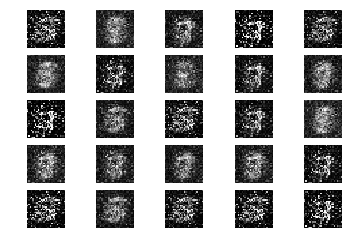

301 [D loss: 0.719088, acc.: 43.36%] [G loss: 0.708236]
302 [D loss: 0.709401, acc.: 48.44%] [G loss: 0.719226]
303 [D loss: 0.726892, acc.: 45.31%] [G loss: 0.708756]
304 [D loss: 0.719377, acc.: 45.70%] [G loss: 0.710321]
305 [D loss: 0.717760, acc.: 47.27%] [G loss: 0.706412]
306 [D loss: 0.710903, acc.: 48.44%] [G loss: 0.730911]
307 [D loss: 0.716963, acc.: 44.92%] [G loss: 0.711872]
308 [D loss: 0.719831, acc.: 45.31%] [G loss: 0.699321]
309 [D loss: 0.739367, acc.: 42.58%] [G loss: 0.689467]
310 [D loss: 0.721669, acc.: 42.58%] [G loss: 0.708455]
311 [D loss: 0.738743, acc.: 41.80%] [G loss: 0.678954]
312 [D loss: 0.718146, acc.: 42.97%] [G loss: 0.689577]
313 [D loss: 0.718620, acc.: 45.31%] [G loss: 0.693417]
314 [D loss: 0.709925, acc.: 45.70%] [G loss: 0.689340]
315 [D loss: 0.707808, acc.: 46.88%] [G loss: 0.688902]
316 [D loss: 0.742208, acc.: 39.06%] [G loss: 0.657564]
317 [D loss: 0.715237, acc.: 46.88%] [G loss: 0.658993]
318 [D loss: 0.709943, acc.: 46.88%] [G loss: 0.

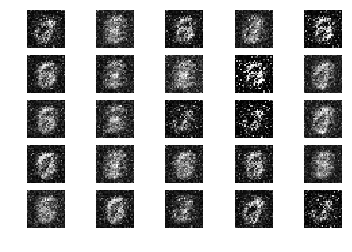

351 [D loss: 0.681355, acc.: 47.66%] [G loss: 0.664857]
352 [D loss: 0.680740, acc.: 47.66%] [G loss: 0.660133]
353 [D loss: 0.678551, acc.: 47.27%] [G loss: 0.666624]
354 [D loss: 0.682659, acc.: 46.48%] [G loss: 0.664502]
355 [D loss: 0.664956, acc.: 48.44%] [G loss: 0.669925]
356 [D loss: 0.679117, acc.: 46.88%] [G loss: 0.668186]
357 [D loss: 0.677273, acc.: 47.27%] [G loss: 0.663085]
358 [D loss: 0.680310, acc.: 47.27%] [G loss: 0.658891]
359 [D loss: 0.666121, acc.: 47.66%] [G loss: 0.657223]
360 [D loss: 0.686165, acc.: 46.88%] [G loss: 0.664718]
361 [D loss: 0.684322, acc.: 46.09%] [G loss: 0.667861]
362 [D loss: 0.683832, acc.: 45.70%] [G loss: 0.668314]
363 [D loss: 0.679269, acc.: 46.88%] [G loss: 0.665259]
364 [D loss: 0.673496, acc.: 48.05%] [G loss: 0.660371]
365 [D loss: 0.676991, acc.: 47.66%] [G loss: 0.661360]
366 [D loss: 0.688860, acc.: 47.27%] [G loss: 0.663343]
367 [D loss: 0.665146, acc.: 48.83%] [G loss: 0.670909]
368 [D loss: 0.655789, acc.: 50.00%] [G loss: 0.

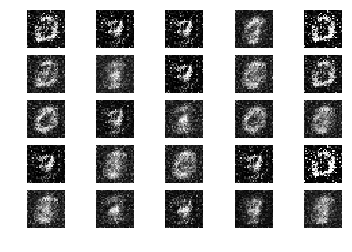

401 [D loss: 0.670207, acc.: 48.05%] [G loss: 0.673661]
402 [D loss: 0.664835, acc.: 53.12%] [G loss: 0.677390]
403 [D loss: 0.670370, acc.: 51.56%] [G loss: 0.690282]
404 [D loss: 0.662248, acc.: 52.73%] [G loss: 0.687081]
405 [D loss: 0.667433, acc.: 51.56%] [G loss: 0.681493]
406 [D loss: 0.665940, acc.: 51.95%] [G loss: 0.676903]
407 [D loss: 0.661246, acc.: 53.12%] [G loss: 0.683489]
408 [D loss: 0.664505, acc.: 55.47%] [G loss: 0.681725]
409 [D loss: 0.669498, acc.: 52.34%] [G loss: 0.678598]
410 [D loss: 0.671292, acc.: 51.95%] [G loss: 0.683573]
411 [D loss: 0.673953, acc.: 50.78%] [G loss: 0.685630]
412 [D loss: 0.679798, acc.: 46.09%] [G loss: 0.687660]
413 [D loss: 0.670001, acc.: 49.22%] [G loss: 0.686568]
414 [D loss: 0.667624, acc.: 51.95%] [G loss: 0.681446]
415 [D loss: 0.665843, acc.: 49.61%] [G loss: 0.689865]
416 [D loss: 0.663818, acc.: 50.00%] [G loss: 0.681461]
417 [D loss: 0.676420, acc.: 48.83%] [G loss: 0.689505]
418 [D loss: 0.669773, acc.: 48.05%] [G loss: 0.

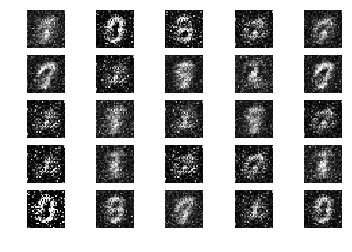

451 [D loss: 0.654926, acc.: 50.00%] [G loss: 0.685100]
452 [D loss: 0.659124, acc.: 49.61%] [G loss: 0.678378]
453 [D loss: 0.672592, acc.: 49.22%] [G loss: 0.682052]
454 [D loss: 0.675191, acc.: 49.61%] [G loss: 0.686705]
455 [D loss: 0.663174, acc.: 49.61%] [G loss: 0.695339]
456 [D loss: 0.674549, acc.: 49.22%] [G loss: 0.692397]
457 [D loss: 0.674792, acc.: 49.61%] [G loss: 0.708457]
458 [D loss: 0.677537, acc.: 47.27%] [G loss: 0.708938]
459 [D loss: 0.672138, acc.: 50.00%] [G loss: 0.697610]
460 [D loss: 0.684384, acc.: 46.88%] [G loss: 0.684815]
461 [D loss: 0.678885, acc.: 48.05%] [G loss: 0.683094]
462 [D loss: 0.680557, acc.: 48.44%] [G loss: 0.693562]
463 [D loss: 0.670513, acc.: 48.05%] [G loss: 0.704076]
464 [D loss: 0.678685, acc.: 45.70%] [G loss: 0.706998]
465 [D loss: 0.676748, acc.: 46.88%] [G loss: 0.714755]
466 [D loss: 0.662352, acc.: 47.27%] [G loss: 0.727613]
467 [D loss: 0.663600, acc.: 48.05%] [G loss: 0.729672]
468 [D loss: 0.661627, acc.: 47.66%] [G loss: 0.

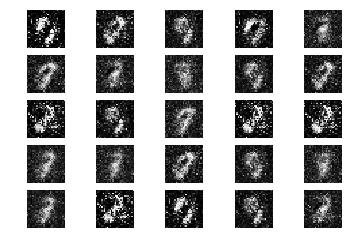

501 [D loss: 0.658428, acc.: 50.39%] [G loss: 0.718264]
502 [D loss: 0.652531, acc.: 50.00%] [G loss: 0.720818]
503 [D loss: 0.646716, acc.: 52.73%] [G loss: 0.723385]
504 [D loss: 0.653759, acc.: 55.47%] [G loss: 0.724596]
505 [D loss: 0.645437, acc.: 55.47%] [G loss: 0.735716]
506 [D loss: 0.647257, acc.: 60.16%] [G loss: 0.732438]
507 [D loss: 0.644890, acc.: 58.20%] [G loss: 0.713524]
508 [D loss: 0.660760, acc.: 58.98%] [G loss: 0.721222]
509 [D loss: 0.649558, acc.: 57.42%] [G loss: 0.725050]
510 [D loss: 0.647723, acc.: 58.59%] [G loss: 0.725713]
511 [D loss: 0.646950, acc.: 56.64%] [G loss: 0.716963]
512 [D loss: 0.658665, acc.: 55.86%] [G loss: 0.712123]
513 [D loss: 0.648781, acc.: 57.03%] [G loss: 0.715343]
514 [D loss: 0.658118, acc.: 53.12%] [G loss: 0.716563]
515 [D loss: 0.651684, acc.: 54.69%] [G loss: 0.719634]
516 [D loss: 0.645883, acc.: 54.69%] [G loss: 0.725603]
517 [D loss: 0.648314, acc.: 51.56%] [G loss: 0.732832]
518 [D loss: 0.630699, acc.: 54.30%] [G loss: 0.

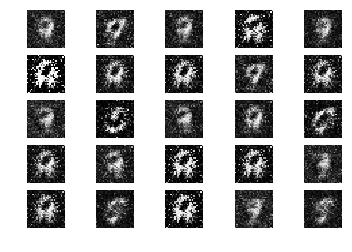

551 [D loss: 0.628675, acc.: 52.73%] [G loss: 0.761041]
552 [D loss: 0.628226, acc.: 57.03%] [G loss: 0.768740]
553 [D loss: 0.631341, acc.: 55.86%] [G loss: 0.769006]
554 [D loss: 0.621547, acc.: 58.98%] [G loss: 0.777802]
555 [D loss: 0.621675, acc.: 56.25%] [G loss: 0.774453]
556 [D loss: 0.623795, acc.: 58.98%] [G loss: 0.767570]
557 [D loss: 0.620277, acc.: 62.11%] [G loss: 0.772342]
558 [D loss: 0.620946, acc.: 55.86%] [G loss: 0.770805]
559 [D loss: 0.619298, acc.: 64.45%] [G loss: 0.774900]
560 [D loss: 0.614280, acc.: 69.14%] [G loss: 0.757448]
561 [D loss: 0.639994, acc.: 58.98%] [G loss: 0.752212]
562 [D loss: 0.646021, acc.: 56.64%] [G loss: 0.761204]
563 [D loss: 0.636320, acc.: 59.38%] [G loss: 0.760298]
564 [D loss: 0.635791, acc.: 58.59%] [G loss: 0.754799]
565 [D loss: 0.637826, acc.: 58.98%] [G loss: 0.742691]
566 [D loss: 0.643267, acc.: 57.03%] [G loss: 0.761917]
567 [D loss: 0.637053, acc.: 59.77%] [G loss: 0.776748]
568 [D loss: 0.646521, acc.: 58.98%] [G loss: 0.

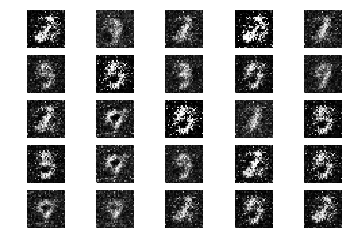

601 [D loss: 0.652274, acc.: 54.69%] [G loss: 0.785437]
602 [D loss: 0.665136, acc.: 53.52%] [G loss: 0.800167]
603 [D loss: 0.632410, acc.: 60.55%] [G loss: 0.814492]
604 [D loss: 0.639642, acc.: 55.86%] [G loss: 0.826295]
605 [D loss: 0.643430, acc.: 60.55%] [G loss: 0.833136]
606 [D loss: 0.672039, acc.: 53.12%] [G loss: 0.818137]
607 [D loss: 0.648321, acc.: 58.59%] [G loss: 0.793553]
608 [D loss: 0.642824, acc.: 64.84%] [G loss: 0.782796]
609 [D loss: 0.644778, acc.: 63.67%] [G loss: 0.793362]
610 [D loss: 0.636630, acc.: 65.23%] [G loss: 0.779844]
611 [D loss: 0.631702, acc.: 62.50%] [G loss: 0.782229]
612 [D loss: 0.648162, acc.: 59.38%] [G loss: 0.773707]
613 [D loss: 0.638436, acc.: 62.50%] [G loss: 0.765837]
614 [D loss: 0.647431, acc.: 58.59%] [G loss: 0.763456]
615 [D loss: 0.635746, acc.: 62.11%] [G loss: 0.753892]
616 [D loss: 0.622014, acc.: 61.33%] [G loss: 0.758156]
617 [D loss: 0.639432, acc.: 59.38%] [G loss: 0.764515]
618 [D loss: 0.627581, acc.: 62.50%] [G loss: 0.

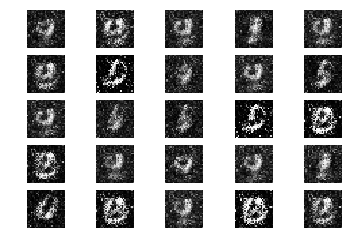

651 [D loss: 0.620566, acc.: 69.53%] [G loss: 0.802382]
652 [D loss: 0.625403, acc.: 62.89%] [G loss: 0.801920]
653 [D loss: 0.616688, acc.: 66.80%] [G loss: 0.800765]
654 [D loss: 0.619397, acc.: 69.14%] [G loss: 0.789615]
655 [D loss: 0.617484, acc.: 70.70%] [G loss: 0.805542]
656 [D loss: 0.642374, acc.: 69.53%] [G loss: 0.821804]
657 [D loss: 0.619991, acc.: 69.53%] [G loss: 0.817272]
658 [D loss: 0.632983, acc.: 59.77%] [G loss: 0.810943]
659 [D loss: 0.631620, acc.: 56.25%] [G loss: 0.795311]
660 [D loss: 0.630682, acc.: 59.38%] [G loss: 0.799488]
661 [D loss: 0.613786, acc.: 63.67%] [G loss: 0.816777]
662 [D loss: 0.620440, acc.: 61.33%] [G loss: 0.809207]
663 [D loss: 0.634840, acc.: 61.72%] [G loss: 0.792039]
664 [D loss: 0.629868, acc.: 60.55%] [G loss: 0.796419]
665 [D loss: 0.644802, acc.: 55.08%] [G loss: 0.786082]
666 [D loss: 0.624941, acc.: 66.02%] [G loss: 0.774536]
667 [D loss: 0.632527, acc.: 61.33%] [G loss: 0.773807]
668 [D loss: 0.635655, acc.: 62.11%] [G loss: 0.

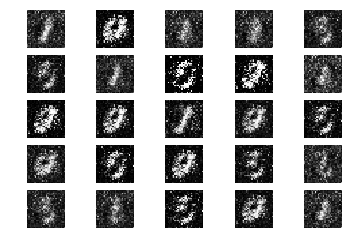

701 [D loss: 0.594979, acc.: 71.88%] [G loss: 0.847229]
702 [D loss: 0.599814, acc.: 75.00%] [G loss: 0.853593]
703 [D loss: 0.601234, acc.: 76.56%] [G loss: 0.850797]
704 [D loss: 0.612214, acc.: 75.39%] [G loss: 0.829079]
705 [D loss: 0.604765, acc.: 71.48%] [G loss: 0.839261]
706 [D loss: 0.596766, acc.: 72.66%] [G loss: 0.838605]
707 [D loss: 0.591177, acc.: 78.12%] [G loss: 0.833275]
708 [D loss: 0.588760, acc.: 76.17%] [G loss: 0.818498]
709 [D loss: 0.599916, acc.: 71.48%] [G loss: 0.801764]
710 [D loss: 0.575513, acc.: 69.92%] [G loss: 0.815266]
711 [D loss: 0.595098, acc.: 69.92%] [G loss: 0.829124]
712 [D loss: 0.613556, acc.: 70.70%] [G loss: 0.804793]
713 [D loss: 0.604464, acc.: 72.27%] [G loss: 0.815339]
714 [D loss: 0.598835, acc.: 71.88%] [G loss: 0.826668]
715 [D loss: 0.614001, acc.: 68.36%] [G loss: 0.829392]
716 [D loss: 0.612127, acc.: 70.31%] [G loss: 0.829625]
717 [D loss: 0.617065, acc.: 71.09%] [G loss: 0.855662]
718 [D loss: 0.620957, acc.: 68.75%] [G loss: 0.

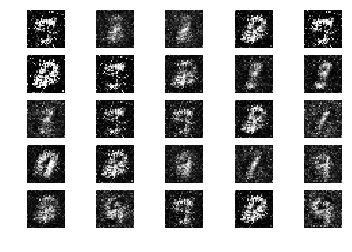

751 [D loss: 0.607588, acc.: 67.58%] [G loss: 0.861328]
752 [D loss: 0.617314, acc.: 69.14%] [G loss: 0.858894]
753 [D loss: 0.610668, acc.: 69.92%] [G loss: 0.866493]
754 [D loss: 0.614714, acc.: 67.19%] [G loss: 0.874729]
755 [D loss: 0.622143, acc.: 63.67%] [G loss: 0.860227]
756 [D loss: 0.627980, acc.: 60.55%] [G loss: 0.818717]
757 [D loss: 0.627687, acc.: 56.64%] [G loss: 0.795378]
758 [D loss: 0.632250, acc.: 57.81%] [G loss: 0.778937]
759 [D loss: 0.615809, acc.: 66.02%] [G loss: 0.768038]
760 [D loss: 0.625557, acc.: 68.75%] [G loss: 0.770411]
761 [D loss: 0.632204, acc.: 63.28%] [G loss: 0.779916]
762 [D loss: 0.636563, acc.: 59.38%] [G loss: 0.778421]
763 [D loss: 0.652227, acc.: 55.47%] [G loss: 0.794175]
764 [D loss: 0.628174, acc.: 62.11%] [G loss: 0.783725]
765 [D loss: 0.634022, acc.: 63.67%] [G loss: 0.767363]
766 [D loss: 0.645249, acc.: 60.55%] [G loss: 0.764991]
767 [D loss: 0.636969, acc.: 68.75%] [G loss: 0.785621]
768 [D loss: 0.633838, acc.: 69.92%] [G loss: 0.

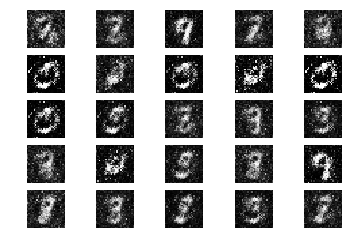

801 [D loss: 0.611969, acc.: 66.02%] [G loss: 0.867059]
802 [D loss: 0.618467, acc.: 67.19%] [G loss: 0.872971]
803 [D loss: 0.622819, acc.: 64.84%] [G loss: 0.858083]
804 [D loss: 0.605413, acc.: 67.19%] [G loss: 0.876211]
805 [D loss: 0.601839, acc.: 71.48%] [G loss: 0.897487]
806 [D loss: 0.615535, acc.: 68.75%] [G loss: 0.879807]
807 [D loss: 0.609795, acc.: 69.92%] [G loss: 0.868768]
808 [D loss: 0.605059, acc.: 69.14%] [G loss: 0.883184]
809 [D loss: 0.589604, acc.: 75.78%] [G loss: 0.884650]
810 [D loss: 0.604207, acc.: 69.92%] [G loss: 0.877283]
811 [D loss: 0.615705, acc.: 65.23%] [G loss: 0.883820]
812 [D loss: 0.610965, acc.: 68.75%] [G loss: 0.874335]
813 [D loss: 0.614195, acc.: 63.28%] [G loss: 0.915305]
814 [D loss: 0.596267, acc.: 71.48%] [G loss: 0.936159]
815 [D loss: 0.616826, acc.: 67.19%] [G loss: 0.912679]
816 [D loss: 0.598503, acc.: 69.53%] [G loss: 0.924659]
817 [D loss: 0.588652, acc.: 70.70%] [G loss: 0.917616]
818 [D loss: 0.590405, acc.: 73.44%] [G loss: 0.

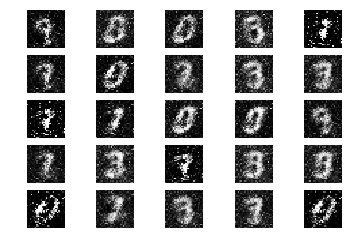

851 [D loss: 0.635315, acc.: 64.45%] [G loss: 0.926432]
852 [D loss: 0.641088, acc.: 61.72%] [G loss: 0.906663]
853 [D loss: 0.621598, acc.: 64.45%] [G loss: 0.960910]
854 [D loss: 0.598981, acc.: 77.34%] [G loss: 0.964350]
855 [D loss: 0.604017, acc.: 73.05%] [G loss: 0.954904]
856 [D loss: 0.646936, acc.: 63.67%] [G loss: 0.889789]
857 [D loss: 0.615665, acc.: 65.62%] [G loss: 0.870423]
858 [D loss: 0.652895, acc.: 56.64%] [G loss: 0.869214]
859 [D loss: 0.593723, acc.: 71.09%] [G loss: 0.909080]
860 [D loss: 0.626472, acc.: 66.80%] [G loss: 0.905668]
861 [D loss: 0.610534, acc.: 71.09%] [G loss: 0.902269]
862 [D loss: 0.638455, acc.: 65.62%] [G loss: 0.945054]
863 [D loss: 0.640881, acc.: 62.50%] [G loss: 0.921205]
864 [D loss: 0.601207, acc.: 71.48%] [G loss: 0.868443]
865 [D loss: 0.639649, acc.: 65.62%] [G loss: 0.857448]
866 [D loss: 0.626482, acc.: 72.27%] [G loss: 0.853513]
867 [D loss: 0.609755, acc.: 71.48%] [G loss: 0.851186]
868 [D loss: 0.608824, acc.: 68.75%] [G loss: 0.

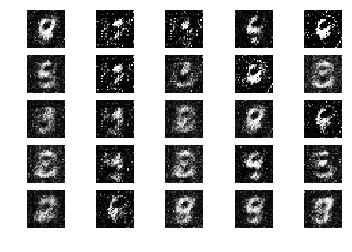

901 [D loss: 0.601173, acc.: 67.97%] [G loss: 0.920087]
902 [D loss: 0.598248, acc.: 63.28%] [G loss: 0.923553]
903 [D loss: 0.598093, acc.: 66.80%] [G loss: 0.912931]
904 [D loss: 0.598950, acc.: 69.14%] [G loss: 0.922899]
905 [D loss: 0.592519, acc.: 67.58%] [G loss: 0.952197]
906 [D loss: 0.599295, acc.: 65.62%] [G loss: 0.984218]
907 [D loss: 0.609711, acc.: 65.23%] [G loss: 0.943758]
908 [D loss: 0.598626, acc.: 73.44%] [G loss: 0.928839]
909 [D loss: 0.623980, acc.: 66.80%] [G loss: 0.925462]
910 [D loss: 0.617583, acc.: 63.28%] [G loss: 0.957829]
911 [D loss: 0.603720, acc.: 67.97%] [G loss: 0.969052]
912 [D loss: 0.621102, acc.: 68.75%] [G loss: 0.908027]
913 [D loss: 0.588876, acc.: 71.09%] [G loss: 0.943094]
914 [D loss: 0.597180, acc.: 69.53%] [G loss: 0.957611]
915 [D loss: 0.609788, acc.: 66.02%] [G loss: 0.962506]
916 [D loss: 0.620008, acc.: 64.84%] [G loss: 0.956868]
917 [D loss: 0.573638, acc.: 72.27%] [G loss: 0.962424]
918 [D loss: 0.642171, acc.: 63.28%] [G loss: 0.

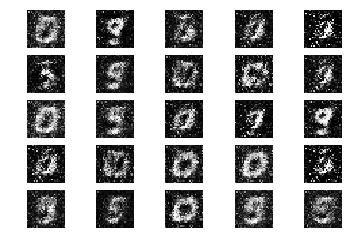

951 [D loss: 0.578903, acc.: 75.39%] [G loss: 0.891926]
952 [D loss: 0.580158, acc.: 74.61%] [G loss: 0.903243]
953 [D loss: 0.583204, acc.: 74.22%] [G loss: 0.904240]
954 [D loss: 0.589781, acc.: 69.53%] [G loss: 0.927446]
955 [D loss: 0.574025, acc.: 77.34%] [G loss: 0.947193]
956 [D loss: 0.567117, acc.: 77.73%] [G loss: 0.953299]
957 [D loss: 0.576246, acc.: 78.52%] [G loss: 0.940368]
958 [D loss: 0.586573, acc.: 76.95%] [G loss: 0.923702]
959 [D loss: 0.581687, acc.: 73.83%] [G loss: 0.912777]
960 [D loss: 0.563581, acc.: 76.95%] [G loss: 0.914333]
961 [D loss: 0.562932, acc.: 76.95%] [G loss: 0.923631]
962 [D loss: 0.591770, acc.: 71.09%] [G loss: 0.925384]
963 [D loss: 0.570894, acc.: 73.83%] [G loss: 0.947099]
964 [D loss: 0.585627, acc.: 73.83%] [G loss: 0.967906]
965 [D loss: 0.599216, acc.: 70.70%] [G loss: 0.958293]
966 [D loss: 0.612191, acc.: 64.45%] [G loss: 0.961193]
967 [D loss: 0.587091, acc.: 70.70%] [G loss: 0.958761]
968 [D loss: 0.600299, acc.: 68.75%] [G loss: 0.

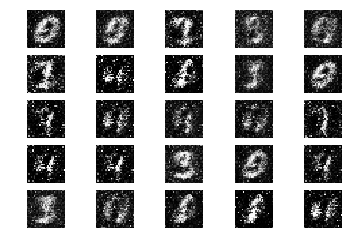

1001 [D loss: 0.582494, acc.: 78.12%] [G loss: 0.931228]
1002 [D loss: 0.606804, acc.: 69.92%] [G loss: 0.944117]
1003 [D loss: 0.574505, acc.: 77.34%] [G loss: 0.956459]
1004 [D loss: 0.620045, acc.: 64.45%] [G loss: 0.928354]
1005 [D loss: 0.579495, acc.: 73.83%] [G loss: 0.949090]
1006 [D loss: 0.608557, acc.: 69.53%] [G loss: 0.960184]
1007 [D loss: 0.628286, acc.: 61.72%] [G loss: 0.921118]
1008 [D loss: 0.618599, acc.: 60.55%] [G loss: 0.928288]
1009 [D loss: 0.635612, acc.: 61.33%] [G loss: 0.904678]
1010 [D loss: 0.614168, acc.: 67.97%] [G loss: 0.866065]
1011 [D loss: 0.638819, acc.: 64.06%] [G loss: 0.848476]
1012 [D loss: 0.629301, acc.: 64.84%] [G loss: 0.834268]
1013 [D loss: 0.631226, acc.: 62.11%] [G loss: 0.863060]
1014 [D loss: 0.635756, acc.: 65.62%] [G loss: 0.885487]
1015 [D loss: 0.621598, acc.: 66.41%] [G loss: 0.918506]
1016 [D loss: 0.632914, acc.: 58.59%] [G loss: 0.926970]
1017 [D loss: 0.632567, acc.: 64.45%] [G loss: 0.963602]
1018 [D loss: 0.655265, acc.: 5

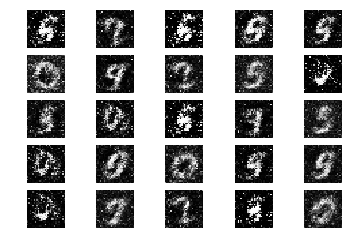

1051 [D loss: 0.593722, acc.: 69.53%] [G loss: 0.905696]
1052 [D loss: 0.606357, acc.: 66.02%] [G loss: 0.903498]
1053 [D loss: 0.629107, acc.: 64.45%] [G loss: 0.918467]
1054 [D loss: 0.631298, acc.: 63.28%] [G loss: 0.943203]
1055 [D loss: 0.617784, acc.: 67.58%] [G loss: 0.942481]
1056 [D loss: 0.610042, acc.: 66.02%] [G loss: 0.942758]
1057 [D loss: 0.596726, acc.: 70.70%] [G loss: 0.913038]
1058 [D loss: 0.611287, acc.: 65.23%] [G loss: 0.896760]
1059 [D loss: 0.608178, acc.: 66.41%] [G loss: 0.889027]
1060 [D loss: 0.640890, acc.: 55.08%] [G loss: 0.897823]
1061 [D loss: 0.622701, acc.: 66.02%] [G loss: 0.909992]
1062 [D loss: 0.614744, acc.: 68.36%] [G loss: 0.933326]
1063 [D loss: 0.607451, acc.: 67.97%] [G loss: 0.927756]
1064 [D loss: 0.617366, acc.: 69.14%] [G loss: 0.919028]
1065 [D loss: 0.613311, acc.: 65.23%] [G loss: 0.955292]
1066 [D loss: 0.619475, acc.: 62.89%] [G loss: 0.931471]
1067 [D loss: 0.599558, acc.: 69.14%] [G loss: 0.921336]
1068 [D loss: 0.604539, acc.: 6

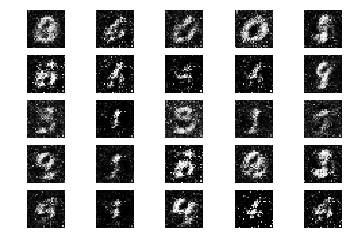

1101 [D loss: 0.597649, acc.: 71.09%] [G loss: 0.893978]
1102 [D loss: 0.596488, acc.: 72.27%] [G loss: 0.910526]
1103 [D loss: 0.610346, acc.: 71.48%] [G loss: 0.894912]
1104 [D loss: 0.623097, acc.: 68.36%] [G loss: 0.882538]
1105 [D loss: 0.615855, acc.: 69.53%] [G loss: 0.874396]
1106 [D loss: 0.610305, acc.: 69.14%] [G loss: 0.914439]
1107 [D loss: 0.625332, acc.: 70.70%] [G loss: 0.912393]
1108 [D loss: 0.605141, acc.: 71.88%] [G loss: 0.920736]
1109 [D loss: 0.604421, acc.: 70.31%] [G loss: 0.943679]
1110 [D loss: 0.616405, acc.: 67.97%] [G loss: 0.914445]
1111 [D loss: 0.608882, acc.: 72.27%] [G loss: 0.898146]
1112 [D loss: 0.602109, acc.: 67.97%] [G loss: 0.910506]
1113 [D loss: 0.590071, acc.: 72.27%] [G loss: 0.885844]
1114 [D loss: 0.631303, acc.: 59.38%] [G loss: 0.893184]
1115 [D loss: 0.605906, acc.: 67.19%] [G loss: 0.942696]
1116 [D loss: 0.603553, acc.: 70.70%] [G loss: 0.915465]
1117 [D loss: 0.604417, acc.: 69.92%] [G loss: 0.902846]
1118 [D loss: 0.607865, acc.: 7

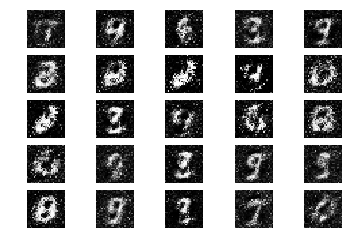

1151 [D loss: 0.636685, acc.: 64.06%] [G loss: 0.910944]
1152 [D loss: 0.594277, acc.: 66.80%] [G loss: 0.870759]
1153 [D loss: 0.603092, acc.: 68.75%] [G loss: 0.889378]
1154 [D loss: 0.612377, acc.: 67.58%] [G loss: 0.867904]
1155 [D loss: 0.615956, acc.: 68.75%] [G loss: 0.861315]
1156 [D loss: 0.623839, acc.: 64.45%] [G loss: 0.855754]
1157 [D loss: 0.588304, acc.: 71.88%] [G loss: 0.882038]
1158 [D loss: 0.612247, acc.: 68.75%] [G loss: 0.894539]
1159 [D loss: 0.596479, acc.: 70.70%] [G loss: 0.887694]
1160 [D loss: 0.636034, acc.: 64.45%] [G loss: 0.866314]
1161 [D loss: 0.627392, acc.: 63.28%] [G loss: 0.839319]
1162 [D loss: 0.637896, acc.: 64.84%] [G loss: 0.859875]
1163 [D loss: 0.631140, acc.: 64.84%] [G loss: 0.884176]
1164 [D loss: 0.626682, acc.: 62.50%] [G loss: 0.855346]
1165 [D loss: 0.621737, acc.: 64.06%] [G loss: 0.869425]
1166 [D loss: 0.626233, acc.: 66.41%] [G loss: 0.877819]
1167 [D loss: 0.625390, acc.: 66.02%] [G loss: 0.884393]
1168 [D loss: 0.642287, acc.: 6

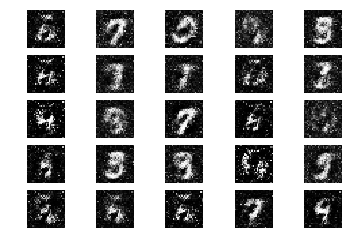

1201 [D loss: 0.645190, acc.: 64.84%] [G loss: 0.881257]
1202 [D loss: 0.633994, acc.: 65.23%] [G loss: 0.897016]
1203 [D loss: 0.627951, acc.: 65.23%] [G loss: 0.907876]
1204 [D loss: 0.655149, acc.: 60.55%] [G loss: 0.876864]
1205 [D loss: 0.627752, acc.: 58.59%] [G loss: 0.852620]
1206 [D loss: 0.625103, acc.: 64.06%] [G loss: 0.852477]
1207 [D loss: 0.626845, acc.: 65.62%] [G loss: 0.859494]
1208 [D loss: 0.614109, acc.: 71.48%] [G loss: 0.890603]
1209 [D loss: 0.635580, acc.: 61.33%] [G loss: 0.864285]
1210 [D loss: 0.593758, acc.: 71.88%] [G loss: 0.867581]
1211 [D loss: 0.626365, acc.: 66.02%] [G loss: 0.858605]
1212 [D loss: 0.647081, acc.: 62.89%] [G loss: 0.837870]
1213 [D loss: 0.618632, acc.: 70.31%] [G loss: 0.826651]
1214 [D loss: 0.602879, acc.: 67.19%] [G loss: 0.854365]
1215 [D loss: 0.632097, acc.: 60.94%] [G loss: 0.861513]
1216 [D loss: 0.624887, acc.: 66.02%] [G loss: 0.846969]
1217 [D loss: 0.618062, acc.: 65.23%] [G loss: 0.856678]
1218 [D loss: 0.618670, acc.: 6

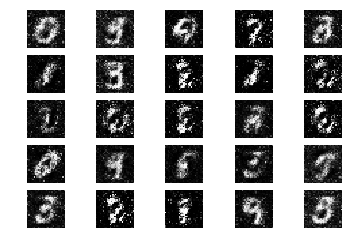

1251 [D loss: 0.620541, acc.: 62.89%] [G loss: 0.836496]
1252 [D loss: 0.611494, acc.: 67.19%] [G loss: 0.835883]
1253 [D loss: 0.627524, acc.: 60.16%] [G loss: 0.842734]
1254 [D loss: 0.602199, acc.: 69.14%] [G loss: 0.889246]
1255 [D loss: 0.619196, acc.: 61.72%] [G loss: 0.862780]
1256 [D loss: 0.617649, acc.: 64.45%] [G loss: 0.884620]
1257 [D loss: 0.616140, acc.: 69.14%] [G loss: 0.832711]
1258 [D loss: 0.624405, acc.: 63.67%] [G loss: 0.839049]
1259 [D loss: 0.640361, acc.: 60.16%] [G loss: 0.862931]
1260 [D loss: 0.634376, acc.: 61.72%] [G loss: 0.875169]
1261 [D loss: 0.663272, acc.: 54.69%] [G loss: 0.859358]
1262 [D loss: 0.657345, acc.: 58.59%] [G loss: 0.823026]
1263 [D loss: 0.626856, acc.: 62.89%] [G loss: 0.856210]
1264 [D loss: 0.663818, acc.: 57.42%] [G loss: 0.870098]
1265 [D loss: 0.625734, acc.: 64.06%] [G loss: 0.885839]
1266 [D loss: 0.647340, acc.: 57.81%] [G loss: 0.869881]
1267 [D loss: 0.652935, acc.: 61.72%] [G loss: 0.888617]
1268 [D loss: 0.626942, acc.: 6

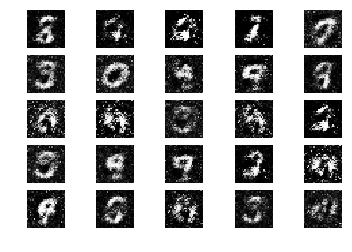

1301 [D loss: 0.626812, acc.: 67.97%] [G loss: 0.893902]
1302 [D loss: 0.612021, acc.: 69.92%] [G loss: 0.874880]
1303 [D loss: 0.627927, acc.: 67.58%] [G loss: 0.886363]
1304 [D loss: 0.591794, acc.: 74.61%] [G loss: 0.862468]
1305 [D loss: 0.620939, acc.: 66.80%] [G loss: 0.858199]
1306 [D loss: 0.592133, acc.: 71.48%] [G loss: 0.864738]
1307 [D loss: 0.599511, acc.: 72.66%] [G loss: 0.878514]
1308 [D loss: 0.602804, acc.: 72.27%] [G loss: 0.876542]
1309 [D loss: 0.603273, acc.: 69.53%] [G loss: 0.868600]
1310 [D loss: 0.602987, acc.: 73.83%] [G loss: 0.847873]
1311 [D loss: 0.607544, acc.: 67.19%] [G loss: 0.860283]
1312 [D loss: 0.618055, acc.: 66.02%] [G loss: 0.838403]
1313 [D loss: 0.595553, acc.: 75.00%] [G loss: 0.877292]
1314 [D loss: 0.622552, acc.: 65.23%] [G loss: 0.883253]
1315 [D loss: 0.579961, acc.: 73.05%] [G loss: 0.896094]
1316 [D loss: 0.604330, acc.: 72.66%] [G loss: 0.907475]
1317 [D loss: 0.568139, acc.: 75.39%] [G loss: 0.901935]
1318 [D loss: 0.602268, acc.: 7

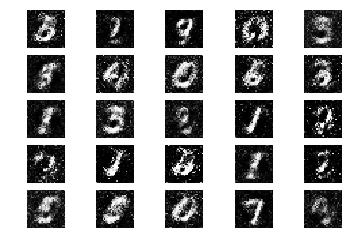

1351 [D loss: 0.594093, acc.: 73.05%] [G loss: 0.889721]
1352 [D loss: 0.592897, acc.: 75.78%] [G loss: 0.914951]
1353 [D loss: 0.582085, acc.: 78.91%] [G loss: 0.927158]
1354 [D loss: 0.578663, acc.: 75.39%] [G loss: 0.904046]
1355 [D loss: 0.585224, acc.: 75.39%] [G loss: 0.882549]
1356 [D loss: 0.608875, acc.: 73.05%] [G loss: 0.895419]
1357 [D loss: 0.604449, acc.: 74.61%] [G loss: 0.894935]
1358 [D loss: 0.605378, acc.: 73.44%] [G loss: 0.921210]
1359 [D loss: 0.603268, acc.: 70.70%] [G loss: 0.918332]
1360 [D loss: 0.600062, acc.: 72.66%] [G loss: 0.916773]
1361 [D loss: 0.601892, acc.: 68.75%] [G loss: 0.872745]
1362 [D loss: 0.586426, acc.: 76.17%] [G loss: 0.886227]
1363 [D loss: 0.602168, acc.: 72.27%] [G loss: 0.908770]
1364 [D loss: 0.579349, acc.: 77.34%] [G loss: 0.898285]
1365 [D loss: 0.586324, acc.: 71.48%] [G loss: 0.928231]
1366 [D loss: 0.577812, acc.: 78.52%] [G loss: 0.916095]
1367 [D loss: 0.609475, acc.: 66.80%] [G loss: 0.891923]
1368 [D loss: 0.590209, acc.: 7

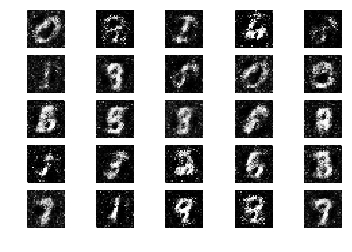

1401 [D loss: 0.620724, acc.: 68.36%] [G loss: 0.868057]
1402 [D loss: 0.608751, acc.: 70.70%] [G loss: 0.858518]
1403 [D loss: 0.619351, acc.: 61.33%] [G loss: 0.853739]
1404 [D loss: 0.640198, acc.: 64.06%] [G loss: 0.894403]
1405 [D loss: 0.609449, acc.: 71.09%] [G loss: 0.873475]
1406 [D loss: 0.617589, acc.: 68.75%] [G loss: 0.873727]
1407 [D loss: 0.607853, acc.: 65.62%] [G loss: 0.890244]
1408 [D loss: 0.591207, acc.: 72.27%] [G loss: 0.923725]
1409 [D loss: 0.609301, acc.: 66.80%] [G loss: 0.939897]
1410 [D loss: 0.606876, acc.: 68.75%] [G loss: 0.914096]
1411 [D loss: 0.619969, acc.: 64.84%] [G loss: 0.920667]
1412 [D loss: 0.616385, acc.: 69.53%] [G loss: 0.905641]
1413 [D loss: 0.602494, acc.: 71.09%] [G loss: 0.904606]
1414 [D loss: 0.607562, acc.: 69.92%] [G loss: 0.920964]
1415 [D loss: 0.599420, acc.: 74.22%] [G loss: 0.927559]
1416 [D loss: 0.633801, acc.: 63.28%] [G loss: 0.933814]
1417 [D loss: 0.601912, acc.: 71.48%] [G loss: 0.890947]
1418 [D loss: 0.623025, acc.: 6

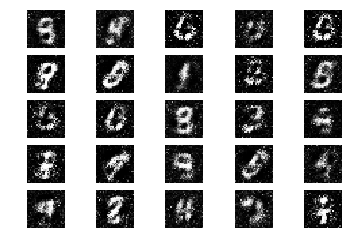

1451 [D loss: 0.610695, acc.: 68.75%] [G loss: 0.902833]
1452 [D loss: 0.600853, acc.: 70.70%] [G loss: 0.868896]
1453 [D loss: 0.621006, acc.: 67.58%] [G loss: 0.868877]
1454 [D loss: 0.617506, acc.: 69.92%] [G loss: 0.866186]
1455 [D loss: 0.609138, acc.: 66.41%] [G loss: 0.861191]
1456 [D loss: 0.619781, acc.: 68.75%] [G loss: 0.885669]
1457 [D loss: 0.623904, acc.: 65.23%] [G loss: 0.884953]
1458 [D loss: 0.599541, acc.: 70.70%] [G loss: 0.888132]
1459 [D loss: 0.610564, acc.: 68.36%] [G loss: 0.883330]
1460 [D loss: 0.593313, acc.: 69.53%] [G loss: 0.897073]
1461 [D loss: 0.619122, acc.: 67.19%] [G loss: 0.895733]
1462 [D loss: 0.587994, acc.: 72.27%] [G loss: 0.887628]
1463 [D loss: 0.606570, acc.: 69.53%] [G loss: 0.900644]
1464 [D loss: 0.592285, acc.: 75.00%] [G loss: 0.917071]
1465 [D loss: 0.596521, acc.: 69.53%] [G loss: 0.905611]
1466 [D loss: 0.607336, acc.: 73.05%] [G loss: 0.924193]
1467 [D loss: 0.612988, acc.: 69.14%] [G loss: 0.877340]
1468 [D loss: 0.629986, acc.: 6

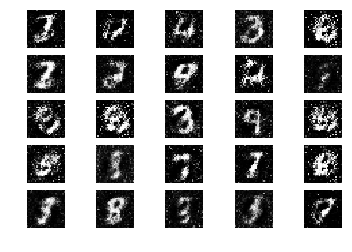

1501 [D loss: 0.615485, acc.: 64.06%] [G loss: 0.881174]
1502 [D loss: 0.611710, acc.: 68.75%] [G loss: 0.845302]
1503 [D loss: 0.628260, acc.: 66.02%] [G loss: 0.851434]
1504 [D loss: 0.626750, acc.: 65.62%] [G loss: 0.819591]
1505 [D loss: 0.620944, acc.: 64.84%] [G loss: 0.847011]
1506 [D loss: 0.627739, acc.: 65.23%] [G loss: 0.864152]
1507 [D loss: 0.605153, acc.: 73.44%] [G loss: 0.859909]
1508 [D loss: 0.611264, acc.: 71.48%] [G loss: 0.850237]
1509 [D loss: 0.604277, acc.: 74.22%] [G loss: 0.874864]
1510 [D loss: 0.623418, acc.: 66.41%] [G loss: 0.875474]
1511 [D loss: 0.636868, acc.: 64.45%] [G loss: 0.842844]
1512 [D loss: 0.609592, acc.: 68.36%] [G loss: 0.863100]
1513 [D loss: 0.619107, acc.: 65.23%] [G loss: 0.851533]
1514 [D loss: 0.592546, acc.: 77.73%] [G loss: 0.855126]
1515 [D loss: 0.619326, acc.: 67.58%] [G loss: 0.886989]
1516 [D loss: 0.614734, acc.: 62.11%] [G loss: 0.854763]
1517 [D loss: 0.587493, acc.: 74.61%] [G loss: 0.843590]
1518 [D loss: 0.617352, acc.: 6

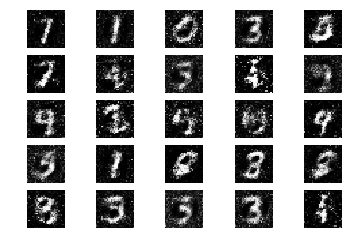

1551 [D loss: 0.637036, acc.: 66.02%] [G loss: 0.806638]
1552 [D loss: 0.623476, acc.: 67.19%] [G loss: 0.830467]
1553 [D loss: 0.637604, acc.: 66.02%] [G loss: 0.851475]
1554 [D loss: 0.620038, acc.: 70.31%] [G loss: 0.845308]
1555 [D loss: 0.635970, acc.: 64.84%] [G loss: 0.845919]
1556 [D loss: 0.626992, acc.: 66.02%] [G loss: 0.830134]
1557 [D loss: 0.615347, acc.: 66.80%] [G loss: 0.835714]
1558 [D loss: 0.620125, acc.: 64.45%] [G loss: 0.833667]
1559 [D loss: 0.621773, acc.: 65.62%] [G loss: 0.837274]
1560 [D loss: 0.633395, acc.: 65.62%] [G loss: 0.848877]
1561 [D loss: 0.616636, acc.: 69.14%] [G loss: 0.855590]
1562 [D loss: 0.625689, acc.: 68.36%] [G loss: 0.861147]
1563 [D loss: 0.648507, acc.: 62.50%] [G loss: 0.814885]
1564 [D loss: 0.637575, acc.: 61.33%] [G loss: 0.843374]
1565 [D loss: 0.619242, acc.: 68.75%] [G loss: 0.860769]
1566 [D loss: 0.633068, acc.: 65.23%] [G loss: 0.827148]
1567 [D loss: 0.631525, acc.: 64.84%] [G loss: 0.844904]
1568 [D loss: 0.619734, acc.: 7

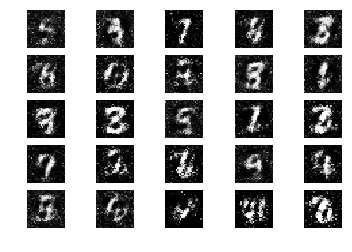

1601 [D loss: 0.608464, acc.: 72.27%] [G loss: 0.878236]
1602 [D loss: 0.611237, acc.: 68.36%] [G loss: 0.884762]
1603 [D loss: 0.608385, acc.: 68.36%] [G loss: 0.865892]
1604 [D loss: 0.622339, acc.: 69.14%] [G loss: 0.861536]
1605 [D loss: 0.611828, acc.: 71.09%] [G loss: 0.864242]
1606 [D loss: 0.614419, acc.: 69.92%] [G loss: 0.858380]
1607 [D loss: 0.622142, acc.: 67.58%] [G loss: 0.876244]
1608 [D loss: 0.628540, acc.: 62.50%] [G loss: 0.843723]
1609 [D loss: 0.608050, acc.: 68.36%] [G loss: 0.872774]
1610 [D loss: 0.633517, acc.: 62.89%] [G loss: 0.868313]
1611 [D loss: 0.623737, acc.: 69.14%] [G loss: 0.836206]
1612 [D loss: 0.625779, acc.: 68.75%] [G loss: 0.819557]
1613 [D loss: 0.607184, acc.: 69.14%] [G loss: 0.830675]
1614 [D loss: 0.594760, acc.: 71.09%] [G loss: 0.867096]
1615 [D loss: 0.599566, acc.: 73.05%] [G loss: 0.844167]
1616 [D loss: 0.634365, acc.: 62.11%] [G loss: 0.846964]
1617 [D loss: 0.602051, acc.: 72.66%] [G loss: 0.845845]
1618 [D loss: 0.628560, acc.: 6

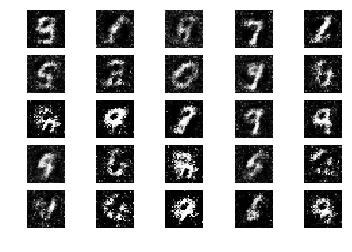

1651 [D loss: 0.615136, acc.: 69.14%] [G loss: 0.843710]
1652 [D loss: 0.631387, acc.: 69.53%] [G loss: 0.854123]
1653 [D loss: 0.630480, acc.: 64.06%] [G loss: 0.836807]
1654 [D loss: 0.610529, acc.: 67.97%] [G loss: 0.858685]
1655 [D loss: 0.617282, acc.: 70.70%] [G loss: 0.859461]
1656 [D loss: 0.641072, acc.: 64.06%] [G loss: 0.857362]
1657 [D loss: 0.646544, acc.: 62.11%] [G loss: 0.854342]
1658 [D loss: 0.640934, acc.: 62.89%] [G loss: 0.824036]
1659 [D loss: 0.642117, acc.: 60.94%] [G loss: 0.843723]
1660 [D loss: 0.632787, acc.: 67.58%] [G loss: 0.846353]
1661 [D loss: 0.613075, acc.: 66.41%] [G loss: 0.859149]
1662 [D loss: 0.653758, acc.: 62.89%] [G loss: 0.862901]
1663 [D loss: 0.621850, acc.: 69.92%] [G loss: 0.863487]
1664 [D loss: 0.643830, acc.: 61.33%] [G loss: 0.854254]
1665 [D loss: 0.626112, acc.: 67.97%] [G loss: 0.863429]
1666 [D loss: 0.622337, acc.: 73.83%] [G loss: 0.843186]
1667 [D loss: 0.592050, acc.: 73.83%] [G loss: 0.856743]
1668 [D loss: 0.624832, acc.: 6

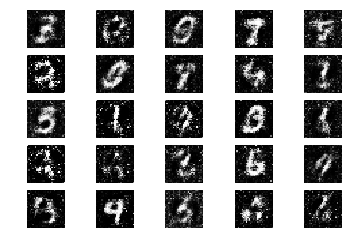

1701 [D loss: 0.617797, acc.: 68.36%] [G loss: 0.822636]
1702 [D loss: 0.608390, acc.: 69.92%] [G loss: 0.864069]
1703 [D loss: 0.614687, acc.: 71.09%] [G loss: 0.880162]
1704 [D loss: 0.628376, acc.: 67.58%] [G loss: 0.842885]
1705 [D loss: 0.603858, acc.: 72.66%] [G loss: 0.879146]
1706 [D loss: 0.604566, acc.: 73.44%] [G loss: 0.895846]
1707 [D loss: 0.595675, acc.: 71.48%] [G loss: 0.847765]
1708 [D loss: 0.617907, acc.: 68.36%] [G loss: 0.844358]
1709 [D loss: 0.614962, acc.: 67.58%] [G loss: 0.845949]
1710 [D loss: 0.612057, acc.: 69.92%] [G loss: 0.861343]
1711 [D loss: 0.610892, acc.: 68.75%] [G loss: 0.860515]
1712 [D loss: 0.624962, acc.: 66.41%] [G loss: 0.848911]
1713 [D loss: 0.614805, acc.: 70.70%] [G loss: 0.858851]
1714 [D loss: 0.620687, acc.: 67.58%] [G loss: 0.869908]
1715 [D loss: 0.631169, acc.: 66.80%] [G loss: 0.881874]
1716 [D loss: 0.614825, acc.: 71.88%] [G loss: 0.878890]
1717 [D loss: 0.633424, acc.: 66.80%] [G loss: 0.859803]
1718 [D loss: 0.616610, acc.: 7

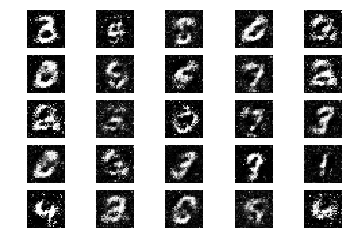

1751 [D loss: 0.608132, acc.: 68.36%] [G loss: 0.872718]
1752 [D loss: 0.598307, acc.: 72.27%] [G loss: 0.887751]
1753 [D loss: 0.597558, acc.: 69.14%] [G loss: 0.894687]
1754 [D loss: 0.597583, acc.: 71.88%] [G loss: 0.918498]
1755 [D loss: 0.604650, acc.: 69.53%] [G loss: 0.906826]
1756 [D loss: 0.588598, acc.: 72.27%] [G loss: 0.939452]
1757 [D loss: 0.602947, acc.: 70.70%] [G loss: 0.884207]
1758 [D loss: 0.581285, acc.: 72.27%] [G loss: 0.911390]
1759 [D loss: 0.612848, acc.: 70.70%] [G loss: 0.884545]
1760 [D loss: 0.602853, acc.: 67.97%] [G loss: 0.902779]
1761 [D loss: 0.586228, acc.: 73.83%] [G loss: 0.903279]
1762 [D loss: 0.616256, acc.: 68.75%] [G loss: 0.876355]
1763 [D loss: 0.615153, acc.: 66.41%] [G loss: 0.885934]
1764 [D loss: 0.606494, acc.: 68.75%] [G loss: 0.887242]
1765 [D loss: 0.620164, acc.: 69.92%] [G loss: 0.866481]
1766 [D loss: 0.605048, acc.: 71.09%] [G loss: 0.873580]
1767 [D loss: 0.623320, acc.: 65.62%] [G loss: 0.853673]
1768 [D loss: 0.585632, acc.: 7

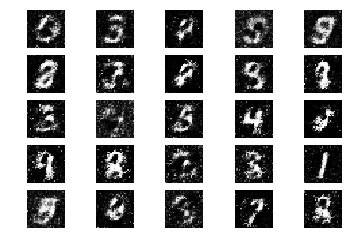

1801 [D loss: 0.613907, acc.: 69.14%] [G loss: 0.868624]
1802 [D loss: 0.619111, acc.: 69.14%] [G loss: 0.846823]
1803 [D loss: 0.652272, acc.: 62.50%] [G loss: 0.885716]
1804 [D loss: 0.614979, acc.: 69.92%] [G loss: 0.863600]
1805 [D loss: 0.637021, acc.: 67.19%] [G loss: 0.847056]
1806 [D loss: 0.618403, acc.: 66.02%] [G loss: 0.841876]
1807 [D loss: 0.615176, acc.: 66.80%] [G loss: 0.861217]
1808 [D loss: 0.595829, acc.: 70.31%] [G loss: 0.850473]
1809 [D loss: 0.606842, acc.: 71.88%] [G loss: 0.870944]
1810 [D loss: 0.617929, acc.: 67.97%] [G loss: 0.860168]
1811 [D loss: 0.619978, acc.: 68.75%] [G loss: 0.868784]
1812 [D loss: 0.632156, acc.: 63.67%] [G loss: 0.846294]
1813 [D loss: 0.637348, acc.: 66.02%] [G loss: 0.839256]
1814 [D loss: 0.604625, acc.: 74.61%] [G loss: 0.875090]
1815 [D loss: 0.613261, acc.: 66.80%] [G loss: 0.848990]
1816 [D loss: 0.620589, acc.: 66.02%] [G loss: 0.840755]
1817 [D loss: 0.607362, acc.: 67.97%] [G loss: 0.878544]
1818 [D loss: 0.618285, acc.: 6

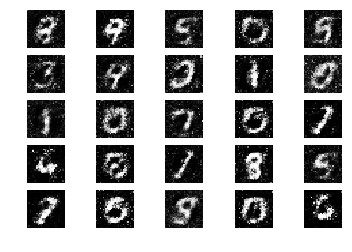

1851 [D loss: 0.617854, acc.: 68.75%] [G loss: 0.867334]
1852 [D loss: 0.584101, acc.: 75.39%] [G loss: 0.905693]
1853 [D loss: 0.605272, acc.: 73.44%] [G loss: 0.877826]
1854 [D loss: 0.631949, acc.: 65.23%] [G loss: 0.882028]
1855 [D loss: 0.609430, acc.: 71.09%] [G loss: 0.848210]
1856 [D loss: 0.607433, acc.: 70.31%] [G loss: 0.875543]
1857 [D loss: 0.601058, acc.: 69.14%] [G loss: 0.873650]
1858 [D loss: 0.627550, acc.: 69.14%] [G loss: 0.859454]
1859 [D loss: 0.597927, acc.: 73.83%] [G loss: 0.870906]
1860 [D loss: 0.608759, acc.: 70.31%] [G loss: 0.862205]
1861 [D loss: 0.613082, acc.: 71.09%] [G loss: 0.846768]
1862 [D loss: 0.614625, acc.: 69.53%] [G loss: 0.876576]
1863 [D loss: 0.630101, acc.: 67.19%] [G loss: 0.871220]
1864 [D loss: 0.618930, acc.: 69.53%] [G loss: 0.849376]
1865 [D loss: 0.608674, acc.: 74.22%] [G loss: 0.897807]
1866 [D loss: 0.613409, acc.: 70.70%] [G loss: 0.848522]
1867 [D loss: 0.626492, acc.: 68.36%] [G loss: 0.876442]
1868 [D loss: 0.590426, acc.: 7

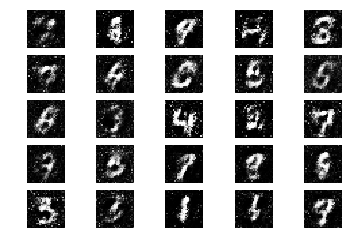

1901 [D loss: 0.610497, acc.: 67.19%] [G loss: 0.868257]
1902 [D loss: 0.621875, acc.: 65.23%] [G loss: 0.845798]
1903 [D loss: 0.599913, acc.: 72.27%] [G loss: 0.866483]
1904 [D loss: 0.599476, acc.: 71.48%] [G loss: 0.846110]
1905 [D loss: 0.612227, acc.: 66.02%] [G loss: 0.858280]
1906 [D loss: 0.614027, acc.: 68.75%] [G loss: 0.877710]
1907 [D loss: 0.616325, acc.: 66.02%] [G loss: 0.874741]
1908 [D loss: 0.602207, acc.: 68.75%] [G loss: 0.855788]
1909 [D loss: 0.583304, acc.: 74.22%] [G loss: 0.895585]
1910 [D loss: 0.593706, acc.: 75.00%] [G loss: 0.894662]
1911 [D loss: 0.595924, acc.: 70.70%] [G loss: 0.891701]
1912 [D loss: 0.606036, acc.: 70.31%] [G loss: 0.893897]
1913 [D loss: 0.596486, acc.: 69.53%] [G loss: 0.867222]
1914 [D loss: 0.618785, acc.: 68.36%] [G loss: 0.877756]
1915 [D loss: 0.611920, acc.: 66.41%] [G loss: 0.885118]
1916 [D loss: 0.605108, acc.: 67.19%] [G loss: 0.875605]
1917 [D loss: 0.587859, acc.: 73.05%] [G loss: 0.896980]
1918 [D loss: 0.598428, acc.: 7

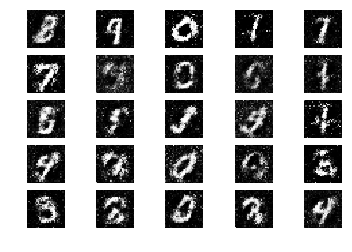

1951 [D loss: 0.606358, acc.: 72.27%] [G loss: 0.898197]
1952 [D loss: 0.629791, acc.: 64.84%] [G loss: 0.894036]
1953 [D loss: 0.607589, acc.: 72.66%] [G loss: 0.899038]
1954 [D loss: 0.615415, acc.: 67.58%] [G loss: 0.896996]
1955 [D loss: 0.602135, acc.: 71.88%] [G loss: 0.895932]
1956 [D loss: 0.596801, acc.: 73.83%] [G loss: 0.927906]
1957 [D loss: 0.598114, acc.: 69.14%] [G loss: 0.896113]
1958 [D loss: 0.600195, acc.: 69.14%] [G loss: 0.924660]
1959 [D loss: 0.597523, acc.: 74.61%] [G loss: 0.930784]
1960 [D loss: 0.601550, acc.: 68.75%] [G loss: 0.884182]
1961 [D loss: 0.597453, acc.: 73.44%] [G loss: 0.881991]
1962 [D loss: 0.604096, acc.: 67.19%] [G loss: 0.914998]
1963 [D loss: 0.599487, acc.: 69.92%] [G loss: 0.917040]
1964 [D loss: 0.582666, acc.: 71.88%] [G loss: 0.889911]
1965 [D loss: 0.610935, acc.: 67.19%] [G loss: 0.928367]
1966 [D loss: 0.599238, acc.: 69.14%] [G loss: 0.943948]
1967 [D loss: 0.596546, acc.: 73.83%] [G loss: 0.914226]
1968 [D loss: 0.589499, acc.: 7

In [11]:
for epoch in range(epochs):

    # Select a random batch of images
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Generate a batch of new images
    gen_imgs = generator.predict(noise)

    # ---------------------
    # Train the discriminator
    # ---------------------

    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    #  Train Generator
    # ---------------------

    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Train the generator (to have the discriminator label samples as valid)
    g_loss = combined.train_on_batch(noise, valid)
    
#     Plot the progress
    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

    # If at save interval => save generated image samples
    if epoch % sample_interval == 0:
        sample_images(epoch)